# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [585]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [586]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
def max_element(arr):
    index = x==0
    if index.sum() == 0:
        return np.NaN
    return x[1:][index[:-1]].max()
max_element(x)

5

### В данном случае index возвращает массив, в котором нули значатся как True. Взяв необходимые срезы и используя функция max(), мы получим искомый элемент.

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [587]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
def nearest_value(X, v):
    distance = np.argmin(abs(X - v))
    return X[distance // len(X[0])][distance % len(X[0])]
nearest_value(X, v)  

4

### В данном случае distance возвращает нам индекс элемента, который максимально близок к некоторому заданному числу, затем по данному индексу мы находим необходимый нам элемент.

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [588]:
X = np.random.randint(15, size=(3, 3))
def scale(X):
    sample_mean = X.mean(axis=0)
    std = X.std(axis=0)
    if (std==0).sum() > 0:
        return "Деление на 0"
    X = (X - sample_mean) / std
    return X
scale(X)

array([[ 0.70710678, -0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678, -1.41421356],
       [-1.41421356,  1.41421356,  0.70710678]])

### Находим выборочное среднее и стандартное отклонение по строке, затем проверяем есть ли в массиве std=0 и если его нет, то выводим изменённую матрицу.

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [589]:
X = np.random.normal(10, 1, (2,2))
def get_stats(X):
    detX = np.linalg.det(X)
    trace = np.trace(X)
    Min = np.min(X)
    Max = np.max(X)
    norm = np.linalg.norm(X)
    eigenval = np.linalg.eig(X)[0]
    inv_matrix = np.linalg.inv(X)
    return detX, trace, Min, Max, norm, eigenval, inv_matrix
A = get_stats(X)
print('Определитель:', A[0])
print('След:', A[1])
print('Наименьший элемент:', A[2])
print('Наибольший элемент:', A[3])
print('Норма Фробениуса:', A[4])
print('Собственные числа:', A[5])
print('Обратная матрица:', A[6])

Определитель: -25.172911157059545
След: 18.32848783348679
Наименьший элемент: 8.807054631062794
Наибольший элемент: 11.088253536222286
Норма Фробениуса: 19.694045453018052
Собственные числа: [-1.28354426 19.61203209]
Обратная матрица: [[-0.37824124  0.39061077]
 [ 0.44048356 -0.34986238]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [590]:
max_elements = np.zeros(100)
for exp_num in range(100):
    X = np.random.normal(0, 1, (10,10))
    Y = np.random.normal(0, 1, (10,10))
    multyply = np.dot(X,Y)
    max_elements[exp_num] = multyply.max()
max_elements

array([10.92511997, 10.89873137, 10.21438861,  6.56674501,  5.43041177,
        8.96933252,  7.00487348, 10.61429038,  9.26653539, 10.84747404,
        9.34507849,  7.9926499 ,  9.14299811,  7.77717431, 12.691957  ,
       11.86095355,  7.92084618,  6.97568644,  6.14445248,  8.44862085,
       12.83103827,  4.46508523,  5.895493  ,  6.4829628 ,  7.87198481,
        6.77309455,  8.84139653,  9.90393934,  5.77167441, 10.35947091,
        7.38948896, 11.40456656,  4.88574191,  9.89704662,  8.26269568,
        7.76158907,  7.56753217, 11.15273288,  8.47367509,  7.33046173,
        8.56171666,  8.87135895,  7.4808862 ,  9.98643954,  8.54426928,
        7.45195584,  8.40506482,  6.59783245,  9.88403232,  6.13719775,
        5.38318537,  6.57948277,  8.02697863, 10.99512316,  6.79761124,
        4.86855656, 12.43331238,  6.93829786, 11.4796998 ,  5.94260349,
       12.67611016, 10.62953016,  9.17911218,  6.41772738,  5.10167019,
        6.60380468,  8.13377129,  8.35847059,  8.73625294,  8.03

### Здесь представлены все максимальные элементы, которые получились после переменожения матриц.

In [591]:
max_elements.mean()

8.382094526230798

### Среднее значение по экспериментам у максимальных элементов - 8.59.

In [592]:
np.percentile(max_elements, 95)

11.863402161204325

### 95-процентная квантиль - 11.63.

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [593]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [594]:
airport = pd.read_csv("2008.csv")
airport

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [595]:
airport.CancellationCode.value_counts()

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

### Самой частой причиной отмены рейста была причина с кодом А (по вине перевозчика), она была 563 раза.

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [596]:
airport.Distance.mean()

724.5082571428571

In [597]:
airport.Distance.min()

31

In [598]:
airport.Distance.max()

4962

### Среднее расстрояние, пройденное самолетом 724.5, минимальное расстояние - 31, максимальное расстояние - 4962.

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни

### Расстояние не выглядит подозрительно, скорее всего, самолёт летит на остров, поэтому расстояние такое маленькое.

In [599]:
airport_local = airport.copy()
colomns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Origin', 'Dest']
airport_local = airport_local[airport_local.Distance == airport_local.Distance.min()][colomns]
airport_local

,Year,Month,DayofMonth,DayOfWeek,FlightNum,Origin,Dest
1116,2008,12,30,2,65,WRG,PSG
6958,2008,12,26,5,65,WRG,PSG
17349,2008,8,18,1,64,PSG,WRG
27534,2008,3,11,2,64,PSG,WRG
46082,2008,8,9,6,65,WRG,PSG
48112,2008,2,28,4,64,PSG,WRG


### Здесь мы видим в какие дни было пройденно данное расстояние (31 миля=50 км), оно было на рейсах  (64 и 65) из Питсбурга на о. Врангеля и наоборот,что подтверждает нашу теорию. 

In [600]:
airport_local = airport.copy()
colomns = ['Origin', 'Dest', 'Distance', 'FlightNum']
airport_local = airport_local[airport_local.FlightNum == 64][colomns]
airport_local

,Origin,Dest,Distance,FlightNum
501,ATL,IAD,533,64
1389,KTN,SEA,680,64
2619,LAS,BOS,2381,64
3869,WRG,KTN,82,64
4025,TPA,JFK,1005,64
4466,JNU,PSG,123,64
6778,JAN,HOU,359,64
7891,LAS,BOS,2381,64
7977,LAS,ATL,1747,64
8448,JNU,PSG,123,64


In [601]:
airport_local.Distance.mean()

748.1282051282051

In [602]:
airport_local = airport.copy()
colomns = ['Origin', 'Dest', 'Distance', 'FlightNum']
airport_local = airport_local[airport_local.FlightNum == 65][colomns]
airport_local

,Origin,Dest,Distance,FlightNum
1116,WRG,PSG,31,65
1517,SEA,KTN,680,65
6326,KTN,WRG,82,65
6958,WRG,PSG,31,65
10113,JNU,ANC,571,65
14646,EWR,LAX,2454,65
15173,JFK,TPA,1005,65
26025,FLL,ATL,581,65
26109,JNU,ANC,571,65
26824,ATL,LAS,1747,65


In [603]:
airport_local.Distance.mean()

783.5128205128206

### В другие дни этими же рейсами было пройденно различное расстояние, если смотреть с точки зрения номера рейса. Среднее расстояние для рейса с номером 64 равно 748 милям, для рейса с номером 65 равно 784 милям.

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [604]:
max_flight = airport.Origin.value_counts().reset_index()
max_flight[max_flight['Origin'] == max_flight.Origin.max()]

,index,Origin
0,ATL,4134


### Из аэропорта ATL было произведено больше всего вылетов, а именно 4134. Этот аэропорт находится в США в городе Атланта.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [605]:
airport_local = airport.copy()
airport_local = airport_local.groupby(['Origin'])['AirTime'].mean().reset_index()
airport_local

,Origin,AirTime
0,ABE,88.266667
1,ABI,36.400000
2,ABQ,93.454321
3,ABY,35.714286
4,ACK,50.800000
...,...,...
292,WRG,18.000000
293,XNA,85.945736
294,YAK,35.900000
295,YKM,79.000000


### Здесь представлено среднее время полёта для каждого аэропорта по всем вылетевшим из него рейсам.

In [606]:
airport_local[airport_local['AirTime'] == airport_local.AirTime.max()]

,Origin,AirTime
262,SJU,205.2


### Наибольшее среднее время полёта, а именно 205.2 минуты имееет аэропорт SJU(расположен в государстве Пуэрто-Рико в городе Каролина).

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [607]:
airport_local = airport[['Origin', 'DepDelay']].copy()
airport_local = airport_local.groupby(['Origin']).filter(lambda x: len(x) >= 1000)
airport_local['NumAllFlights'] = airport_local.groupby('Origin')['DepDelay'].transform('count')
airport_local = airport_local[airport_local['DepDelay'] > 0]
airport_local['NumDelayedFlights'] = airport_local.groupby('Origin')['DepDelay'].transform('count')
airport_local['ShareDelayedFlights'] = airport_local.NumDelayedFlights / airport_local.NumAllFlights
airport_local = airport_local[airport_local.ShareDelayedFlights == airport_local.ShareDelayedFlights.max()]
airport_local.drop_duplicates('Origin')

,Origin,DepDelay,NumAllFlights,NumDelayedFlights,ShareDelayedFlights
79,EWR,11.0,1343,710,0.528667


### Наибольшая доля задержанных рейсов в аэропорту EWR.

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [608]:
airport = pd.read_csv("2008.csv")

In [609]:
airport.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

### В данных имеются пропущенные значения.

In [610]:
airport.isnull().sum().sum()

355215

### В таблице "объект-признак" 355215 пропущенных элементов.

In [611]:
string_NaN = airport.isnull().sum(axis = 1).reset_index()
len(string_NaN[string_NaN[0] > 0])

70000

### 70000 объектов имеют хотя бы один пропуск.

In [612]:
colomn_NaN = airport.isnull().sum().reset_index()
len(colomn_NaN[colomn_NaN[0] > 0])

16

### 16 признаков имеют хотя бы одно пропущенное значение.

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [613]:
airport.DepDelay.isnull().sum()

1399

### В целевой переменной имеются пропущенные значения, их 1399.

In [614]:
DepDelay_NaN = airport[airport.DepDelay.isnull()]
DepDelay_NaN

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [615]:
DepDelay_NaN.Cancelled.sum()

1399

### Это явление вызвано тем, что рейсы, у которых в DepDelay есть пропущенные значения, были отменены. В этом мы можем убедиться, посмотрев на столбец Cancelled, там везде значения 1 (это мы узнаем, сложив значения в этом столбце и получив значение 1399, которое соответствует количеству строк с пропущенной целевой переменной). Я думаю, что можно исключить те признаки из рассмотрения, которые не несут в себе никакой информации о рейсе.

In [616]:
airport = airport[(airport.DepDelay > 0) | (airport.DepDelay < 0)] 
airport

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [617]:
airport.DepDelay.isnull().sum()

0

### Таким образом мы убрали объекты со значениями целевой переменной равной 0 и с пропущенными значениями целевой переменной.  

In [618]:
DepDelay = airport.DepDelay.to_numpy()
DepDelay

array([16., 16., -2., ..., 24.,  6., -1.])

### Выделяем целевую переменную в отдельный вектор.

In [619]:
airport = airport.drop(columns='DepDelay') 
airport

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


### Исключаем целевую переменную из матрицы "объект-признак".

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [620]:
airport['DepTime_Hour'] = airport.DepTime // 100
airport['DepTime_Minute'] = airport.DepTime % 100
airport['CRSDepTime_Hour'] = airport.CRSDepTime // 100
airport['CRSDepTime_Minute'] = airport.CRSDepTime % 100
airport['ArrTime_Hour'] = airport.ArrTime // 100
airport['ArrTime_Minute'] = airport.ArrTime % 100
airport['CRSArrTime_Hour'] = airport.CRSArrTime // 100
airport['CRSArrTime_Minute'] = airport.CRSArrTime % 100

In [621]:
airport

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


### Как мы видим, все нужные колонки созданы и записаны правильно.

In [622]:
airport = airport.drop(columns='DepTime') 
airport = airport.drop(columns='CRSDepTime') 
airport = airport.drop(columns='ArrTime') 
airport = airport.drop(columns='CRSArrTime')
airport

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [623]:
#airport.corr(numeric_only=True)[['DepDelay']]

### Данный код позволяет нам узнать насколько сильно DepDelay коррелирует с другими признаками.

In [624]:
airport = airport.drop(columns='TailNum')
airport = airport.drop(columns='Year')
airport = airport.drop(columns='CarrierDelay')
airport = airport.drop(columns='WeatherDelay')
airport = airport.drop(columns='NASDelay')
airport = airport.drop(columns='SecurityDelay')
airport = airport.drop(columns='LateAircraftDelay')
airport = airport.drop(columns='ArrDelay')
airport

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,CancellationCode,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,NaN,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,NaN,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,NaN,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,NaN,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,NaN,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,NaN,0,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,NaN,0,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,NaN,0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,NaN,0,19.0,6.0,19,0,22.0,0.0,21,39


### Все колонки со словом Delay очень зависят от DepDelay, они хранят зависимые друг от друга данные (информацию о задержке) и поэтому наша модель, скорее всего, будет обучаться, основываясь на этих колонках, а не находя зависимостей от других признаков. Это плохо, так как не зная колонки DepDelay, мы не должны знать о других колонках со словом Delay. 

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

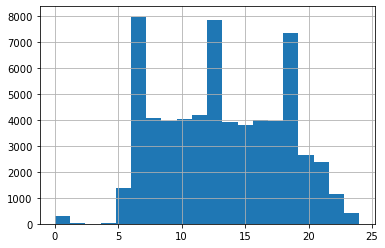

In [625]:
airport['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

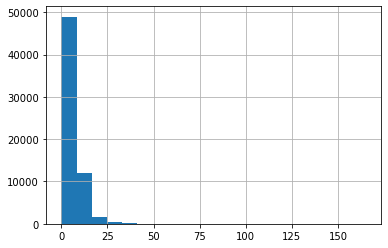

In [626]:
airport['TaxiIn'].hist(bins=20)

<AxesSubplot:>

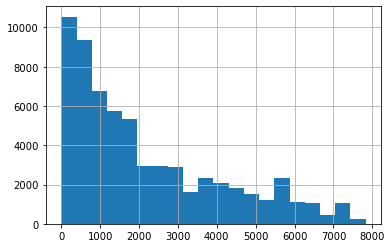

In [627]:
airport['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

### Значения в колонках слишком разняться, в одних значения доходят до 25, в других до 8000. Такая разница в значения, возможно может помешать нам при обучении, поэтому нам необходимо их отмасштабировать.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [628]:
def transform_data(airport):
    categorial_characteristics = airport.select_dtypes(include='object').columns
    real_characteristics = airport.select_dtypes(include='number').columns
    airport[categorial_characteristics] = airport[categorial_characteristics].fillna("nan")
    airport[real_characteristics] = airport[real_characteristics].fillna(0)
    
    scaler = StandardScaler()
    airport[real_characteristics] = scaler.fit_transform(airport[real_characteristics])
    
    airport =  pd.get_dummies(airport)
    
    return airport

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [629]:
airport = transform_data(airport)
airport

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_nan
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,1
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,1
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,1
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,1
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,1
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,1
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,1
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,1


### После преобразования получилось 637 признаков.

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [630]:
X_train, X_test, Y_train, Y_test = train_test_split(airport, DepDelay , test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [631]:
X_train_cut = X_train[:1000]
Y_train_cut = Y_train[:1000]
reg = LinearRegression().fit(X_train_cut, Y_train_cut)
pred_train = reg.predict(X_train_cut)
pred_test = reg.predict(X_test)

print('MSE на подвыборке:', mean_squared_error(Y_train_cut, pred_train))
print('MSE на контрольной выборке:', mean_squared_error(Y_test,pred_test))
print('R2 на подвыборке:', reg.score(X_train_cut,Y_train_cut))
print('R2 на контрольной выборке:', reg.score(X_test,Y_test))

MSE на подвыборке: 563.7874975891114
MSE на контрольной выборке: 5.0496003479806255e+28
R2 на подвыборке: 0.46803299757764305
R2 на контрольной выборке: -3.774925251261606e+25


In [632]:
reg.coef_

array([-7.85757993e-01, -2.78256732e-01,  9.73865297e-01,  1.50733657e+00,
        7.15201081e+01,  2.48453758e+01, -7.61232367e+01, -1.46638413e+01,
       -4.17972149e+00, -7.31510589e+00, -1.90623991e+14, -2.33757647e+00,
        2.80307635e+01,  2.40976604e+00, -1.26100509e+01, -2.89730895e+00,
       -1.87233121e+01, -2.24205253e-01,  7.88905739e+00,  1.85884474e+00,
       -3.12230571e+13, -3.12230571e+13, -1.47285998e+14, -3.12230571e+13,
       -3.12230571e+13, -3.12230571e+13, -3.12230571e+13, -3.12230571e+13,
       -3.12230571e+13, -3.12230571e+13, -3.12230571e+13, -3.12230571e+13,
       -3.12230571e+13, -3.12230571e+13, -3.12230571e+13, -3.12230571e+13,
       -3.12230571e+13, -3.12230571e+13, -3.12230571e+13, -3.12230571e+13,
       -1.06412196e+13, -2.04167872e+12, -2.04167872e+12, -2.04167872e+12,
       -2.65203906e+12, -5.47164551e+12, -2.04167872e+12,  3.45721604e+12,
        9.52693109e+10, -1.85062126e+12, -9.56727661e+11,  4.32873129e+11,
       -2.34564344e+11, -

Text(0, 0.5, 'Количество')

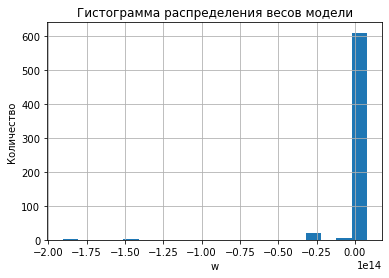

In [633]:
plt.hist(reg.coef_, bins=20)
plt.grid()
plt.title('Гистограмма распределения весов модели')
plt.xlabel('w')
plt.ylabel('Количество')

### Данная модель строит прогнозы очень некачественно, скорее всего это происходит из-за того, что мы берем слишком маленькую обучающую выборку. Разброс весов очень маленький, они  близки к нулю.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [650]:
model = linear_model.Lasso(alpha=0.3162).fit(X_train, Y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('MSE на подвыборке Lasso:', mean_squared_error(Y_train, pred_train))
print('MSE на контрольной выборке Lasso:', mean_squared_error(Y_test,pred_test))
print('R2 на подвыборке Lasso:', model.score(X_train,Y_train))
print('R2 на контрольной выборке Lasso:', model.score(X_test,Y_test))

MSE на подвыборке Lasso: 1151.3385048120824
MSE на контрольной выборке Lasso: 1211.6305726254736
R2 на подвыборке Lasso: 0.10252147518711874
R2 на контрольной выборке Lasso: 0.09422240799045334


In [649]:
model = Ridge(alpha=56.2341).fit(X_train, Y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('MSE на подвыборке Ridge:', mean_squared_error(Y_train, pred_train))
print('MSE на контрольной выборке Ridge:', mean_squared_error(Y_test, pred_test))
print('R2 на подвыборке Ridge:', model.score(X_train,Y_train))
print('R2 на контрольной выборке Ridge:', model.score(X_test, Y_test))

MSE на подвыборке Ridge: 1114.8485025793832
MSE на контрольной выборке Ridge: 1183.5373537584849
R2 на подвыборке Ridge: 0.1309657539438399
R2 на контрольной выборке Ridge: 0.11522403068968834


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [636]:
model_Lasso = linear_model.Lasso().fit(X_train, Y_train)
model_Ridge = Ridge().fit(X_train, Y_train)
eps = 10 ** -6
print('Lasso', (abs(model_Lasso.coef_) < eps).sum())
print('Ridge',(abs(model_Ridge.coef_) < eps).sum())

Lasso 632
Ridge 8


In [637]:
alpha_arr = np.logspace(-3, 3, 25)
num_zero_Lasso = []
num_zero_Ridge = []
for alpha in alpha_arr:
    model_Lasso = linear_model.Lasso(alpha=alpha).fit(X_train, Y_train)
    model_Ridge = Ridge(alpha=alpha).fit(X_train, Y_train)
    num_zero_Lasso.append((abs(model_Lasso.coef_) < eps).sum())
    num_zero_Ridge.append((abs(model_Ridge.coef_) < eps).sum())

Text(0, 0.5, 'Количество нулевых весов')

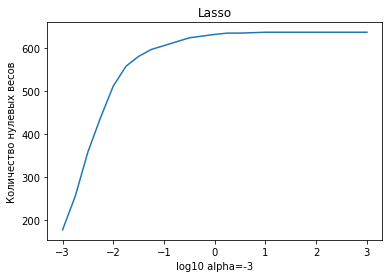

In [651]:
plt.plot(np.log10(alpha_arr), num_zero_Lasso)
plt.title('Lasso')
plt.xlabel('log10 alpha=-3')
plt.ylabel('Количество нулевых весов')

Text(0, 0.5, 'Количество нулевых весов')

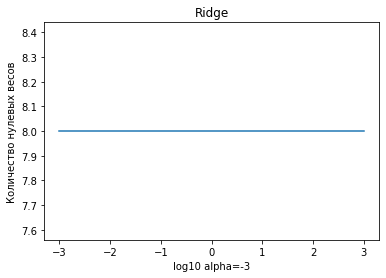

In [652]:
plt.plot(np.log10(alpha_arr), num_zero_Ridge)
plt.title('Ridge')
plt.xlabel('log10 alpha=-3')
plt.ylabel('Количество нулевых весов')

### На графике для Lasso видно, что количество элементов близких к 0 возрастает с увеличением значения alpha. Это соответсвует нашим ожиданиям, так как alpha штрафует значения весов функции, если они слишком большие.  Для графика Ridge видно, что с изменением значения alpha, количество нулевых элементов не изменяется.  Я так понимаю, что для регуляризации нужны большие значения alpha.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [640]:
model = Ridge(alpha=0.1).fit(X_train, Y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
mean_absolute_error
print('RMSE на подвыборке Ridge:', mean_squared_error(Y_train, pred_train) ** 0.5)
print('RMSE на контрольной выборке Ridge:', mean_squared_error(Y_test, pred_test) ** 0.5)
print('MAE на подвыборке Ridge:', mean_absolute_error(Y_train, pred_train))
print('MAE на контрольной выборке Ridge:', mean_absolute_error(Y_test, pred_test))
print('R2 на подвыборке Ridge:', model.score(X_train, Y_train))
print('R2 на контрольной выборке Ridge:', model.score(X_test, Y_test))

RMSE на подвыборке Ridge: 33.27624832247943
RMSE на контрольной выборке Ridge: 34.54426707716237
MAE на подвыборке Ridge: 17.43871479507526
MAE на контрольной выборке Ridge: 17.81224350120755
R2 на подвыборке Ridge: 0.13684309470570943
R2 на контрольной выборке Ridge: 0.10792100250654457


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [641]:
def rmse(y_true, y_pred): 
    error = (y_true - y_pred) ** 2 
    return np.sqrt(np.mean(error)) 

rmse_scorer = make_scorer( 
rmse, 
greater_is_better=False 
)

Best alpha = 0.3162


Text(0, 0.5, 'CV score')

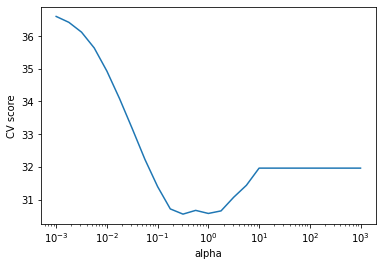

In [642]:
X_train_cut = X_train[:1000]
Y_train_cut = Y_train[:1000]
alpha_arr = np.logspace(-3, 3, 25) 
cv = KFold(n_splits=5) 

searcher = GridSearchCV(linear_model.Lasso(), [{"alpha": alpha_arr}], scoring=rmse_scorer, cv=cv) 
searcher.fit(X_train_cut, Y_train_cut) 

best_alpha = searcher.best_params_["alpha"] 
print("Best alpha = %.4f" % best_alpha) 

plt.plot(alpha_arr, -searcher.cv_results_["mean_test_score"]) 
plt.xscale("log") 
plt.xlabel("alpha") 
plt.ylabel("CV score")

Best alpha = 56.2341


Text(0, 0.5, 'CV score')

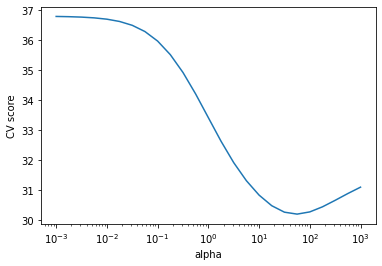

In [643]:
X_train_cut = X_train[:1000]
Y_train_cut = Y_train[:1000]
alpha_arr = np.logspace(-3, 3, 25) 
cv = KFold(n_splits=5) 

searcher = GridSearchCV(linear_model.Ridge(), [{"alpha": alpha_arr}], scoring=rmse_scorer, cv=cv) 
searcher.fit(X_train_cut, Y_train_cut) 

best_alpha = searcher.best_params_["alpha"] 
print("Best alpha = %.4f" % best_alpha) 

plt.plot(alpha_arr, -searcher.cv_results_["mean_test_score"]) 
plt.xscale("log") 
plt.xlabel("alpha") 
plt.ylabel("CV score")

### Качество предсказаний изменилось в лучшую сторону, это видно по оси y, где у нас показано значение ошибки RMSE.

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([8.0000e+00, 2.2000e+01, 2.6000e+01, 2.0000e+01, 2.3000e+01,
        1.8000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 6.4400e+02, 1.4285e+04, 2.0871e+04, 6.4680e+03,
        1.2430e+03, 1.8600e+02, 2.2400e+02, 2.4100e+02, 5.9000e+01,
        2.0000e+01, 5.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-109.41252296, -100.44360226,  -91.47468157,  -82.50576087,
         -73.53684018,  -64.56791948,  -55.59899878,  -46.63007809,
         -37.66115739,  -28.6922367 ,  -19.723316  ,  -10.75439531,
          -1.78547461,    7.18344609,   16.15236678,   25.12128748,
          34.09020817,   43.05912887,   52.02804956,   60.99697026,
          69.96589096,   78.93481165,   87.90373235,   96.87265304,
         105.84157374,  114.81049443]),
 <BarContainer object of 25 artists>)

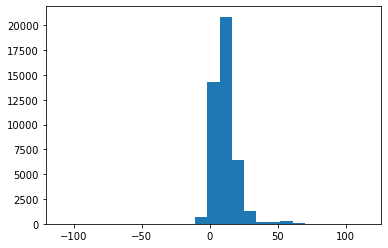

In [644]:
lasso = linear_model.Lasso(alpha=0.3162) 
y_pred = cross_val_predict(lasso, X_train, Y_train, cv=5) 
plt.hist(y_pred, bins=25)

(array([5.0000e+00, 2.4000e+01, 2.6000e+01, 1.6000e+01, 1.0000e+01,
        1.9000e+01, 1.9000e+01, 9.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.1000e+01, 3.3000e+02, 1.0896e+04, 2.2566e+04,
        8.0890e+03, 1.5540e+03, 2.3600e+02, 1.4700e+02, 2.3400e+02,
        1.2900e+02, 4.5000e+01, 9.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([-151.15593608, -140.02145772, -128.88697936, -117.752501  ,
        -106.61802265,  -95.48354429,  -84.34906593,  -73.21458757,
         -62.08010921,  -50.94563085,  -39.81115249,  -28.67667413,
         -17.54219577,   -6.40771741,    4.72676095,   15.8612393 ,
          26.99571766,   38.13019602,   49.26467438,   60.39915274,
          71.5336311 ,   82.66810946,   93.80258782,  104.93706618,
         116.07154454,  127.2060229 ]),
 <BarContainer object of 25 artists>)

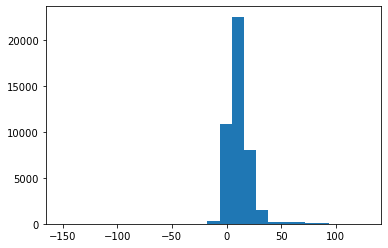

In [645]:
ridge = linear_model.Ridge(alpha=56.2341) 
y_pred = cross_val_predict(ridge, X_train, Y_train, cv=5) 
plt.hist(y_pred, bins=25)

### На графиках мы видим, что основные ошибки в предсказании возникают для значений около 0.